In [2]:
import configparser
import csv
import os
import os.path as ops
import pickle

from PIL import Image
import numpy as np
import scipy
import torch

import matplotlib.pyplot as plt
import argparse
import glob
import json
import cv2
from torchvision.transforms import ToTensor

import sys
sys.path.append("..")
from src.tracktor.datasets.factory import COSMOSTestDataset

# Bulid the dataset

In [3]:
root_track = '../../COSMOS_data_tracktor/Track_data_cosmos/v_and_p/traffic_video_GP020614_190720_0237_0407_90sec_calibrated'
det_root_txt = '../../COSMOS_data_tracktor/mask_detect_result/traffic_video_GP020614_190720_0237_0407_90sec_calibrated.mp4.txt'

In [4]:
dataset = COSMOSTestDataset(root_track, det_root_txt)

# show one sample from the dataset

In [5]:
idx = 10
dataset[idx]

{'img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 'dets_p': tensor([[775., 220., 801., 249.],
         [535., 271., 551., 295.],
         [821., 162., 841., 191.],
         [780., 678., 802., 694.],
         [689., 662., 704., 677.]

In [6]:
print('img type: ', type(dataset[idx]['img']))
print('img shape: ', dataset[idx]['img'].size())

print('dets_p type: ', type(dataset[idx]['dets_p']))
print('dets_p shape: ', dataset[idx]['dets_p'].size())
print('dets_v type: ', type(dataset[idx]['dets_v']))
print('dets_v shape: ', dataset[idx]['dets_v'].size())

print('score_p type: ', type(dataset[idx]['score_p']))
print('score_p shape: ', dataset[idx]['score_p'].size())
print('score_v type: ', type(dataset[idx]['score_v']))
print('score_v shape: ', dataset[idx]['score_v'].size())

print('img_path type: ', type(dataset[idx]['img_path']))
print('gt_p type: ', type(dataset[idx]['gt_p']))
print('gt_v type: ', type(dataset[idx]['gt_v']))

print('dataset length: ', len(dataset))

img type:  <class 'torch.Tensor'>
img shape:  torch.Size([3, 1080, 1920])
dets_p type:  <class 'torch.Tensor'>
dets_p shape:  torch.Size([9, 4])
dets_v type:  <class 'torch.Tensor'>
dets_v shape:  torch.Size([11, 4])
score_p type:  <class 'torch.Tensor'>
score_p shape:  torch.Size([9])
score_v type:  <class 'torch.Tensor'>
score_v shape:  torch.Size([11])
img_path type:  <class 'str'>
gt_p type:  <class 'dict'>
gt_v type:  <class 'dict'>
dataset length:  899


# Show tracking ground truth

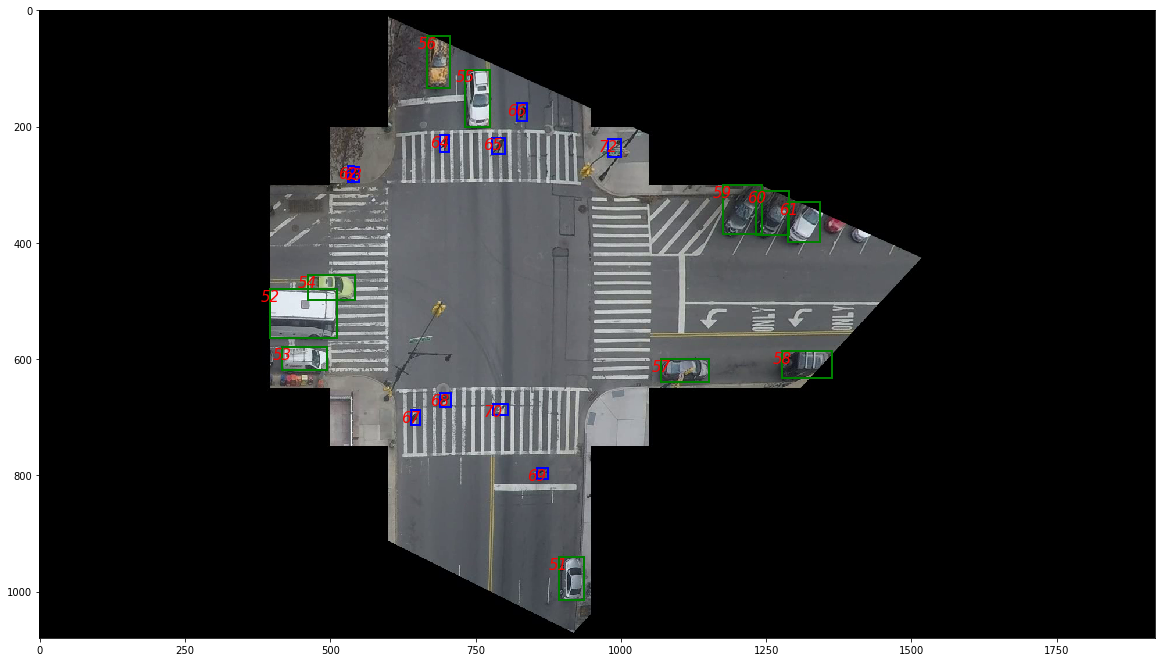

In [7]:
import matplotlib.patches as patches
plt.figure(figsize=(20,20))
plt.imshow(dataset[idx]['img'].numpy().transpose(1,2,0))
currentAxis=plt.gca()
for obj in dataset[idx]['gt_p'].keys():
    rect=patches.Rectangle((dataset[idx]['gt_p'][obj][0], dataset[idx]['gt_p'][obj][1]),
                           dataset[idx]['gt_p'][obj][2]-dataset[idx]['gt_p'][obj][0],dataset[idx]['gt_p'][obj][3]-dataset[idx]['gt_p'][obj][1],
                           linewidth=2,edgecolor='b',facecolor='none')
    currentAxis.add_patch(rect)
    plt.text(dataset[idx]['gt_p'][obj][0], dataset[idx]['gt_p'][obj][1], str(obj), color='r', fontsize=15, style='oblique', ha='center',va='top',wrap=True)

for obj in dataset[idx]['gt_v'].keys():
    rect=patches.Rectangle((dataset[idx]['gt_v'][obj][0], dataset[idx]['gt_v'][obj][1]),
                           dataset[idx]['gt_v'][obj][2]-dataset[idx]['gt_v'][obj][0],dataset[idx]['gt_v'][obj][3]-dataset[idx]['gt_v'][obj][1],
                           linewidth=2,edgecolor='g',facecolor='none')
    currentAxis.add_patch(rect)
    plt.text(dataset[idx]['gt_v'][obj][0], dataset[idx]['gt_v'][obj][1], str(obj), color='r', fontsize=15, style='oblique', ha='center',va='top',wrap=True)

plt.show()

# Show mask R-CNN result

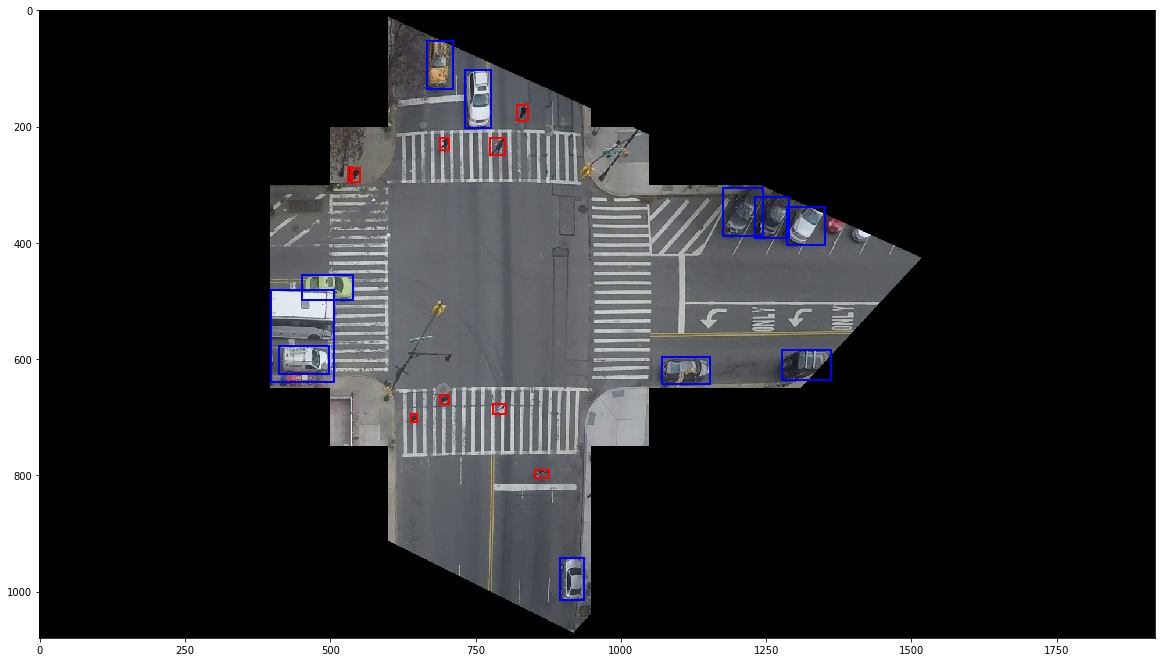

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(dataset[idx]['img'].numpy().transpose(1,2,0))
currentAxis=plt.gca()
for i in range(len(dataset[idx]['dets_p'])):
    box = dataset[idx]['dets_p'][i]
    rect = patches.Rectangle((int(box[0]), int(box[1])), int(box[2])-int(box[0]), int(box[3])-int(box[1]),
                            linewidth=2,edgecolor='r',facecolor='none')
    currentAxis.add_patch(rect)
for i in range(len(dataset[idx]['dets_v'])):
    box = dataset[idx]['dets_v'][i]
    rect = patches.Rectangle((int(box[0]), int(box[1])), int(box[2])-int(box[0]), int(box[3])-int(box[1]),
                            linewidth=2,edgecolor='b',facecolor='none')
    currentAxis.add_patch(rect)
plt.show()